# Netflix Analysis

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [2]:
df = pd.read_csv('Netflix_movies.csv', lineterminator= '\n') # lineterminator --> Error tokenizing data

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

no missing values

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration Summury
1) We have dataframe consisting of 9827 rows and 9 columns.
2) No Missing values or No duplicated values found.
3) Convert 'Release_Date' column 'object' --> 'datetime' and Extract the 'Year' only
4) Drop columns --> 'Overview', 'Poster_Url' (not useful)
5) change Language 'codes' --> 'Names'
6) 'Vote_Average' column can be categorised for proper analysis.
7) 'Genre' column has comma saperated values and white spaces that needs to be handled and casted into category.

## Release_Date column (type change)

In [8]:
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [9]:
df['Release_Date'] = df['Release_Date'].str.split('-').str[0].astype(int)

In [10]:
df['Release_Date'].dtypes

dtype('int32')

## Drop column (Not Useful)

In [11]:
cols = ['Overview', 'Poster_Url']

df.drop(cols, axis = 1, inplace = True)

In [12]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

## Original_Language (code --> Name)

In [13]:
df.head(3)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller


In [14]:
df['Original_Language'].unique()

array(['en', 'ja', 'fr', 'hi', 'es', 'ru', 'de', 'th', 'ko', 'tr', 'cn',
       'zh', 'it', 'pt', 'ml', 'pl', 'fi', 'no', 'da', 'id', 'sv', 'nl',
       'te', 'sr', 'is', 'ro', 'tl', 'fa', 'uk', 'nb', 'eu', 'lv', 'ar',
       'el', 'cs', 'ms', 'bn', 'ca', 'la', 'ta', 'hu', 'he', 'et'],
      dtype=object)

In [15]:
language_mapping = {
    'en': 'English', 'ja': 'Japanese', 'fr': 'French', 'hi': 'Hindi', 'es': 'Spanish',
    'ru': 'Russian', 'de': 'German', 'th': 'Thai', 'ko': 'Korean', 'tr': 'Turkish',
    'cn': 'Chinese', 'zh': 'Chinese', 'it': 'Italian', 'pt': 'Portuguese', 'ml': 'Malayalam',
    'pl': 'Polish', 'fi': 'Finnish', 'no': 'Norwegian', 'da': 'Danish', 'id': 'Indonesian',
    'sv': 'Swedish', 'nl': 'Dutch', 'te': 'Telugu', 'sr': 'Serbian', 'is': 'Icelandic',
    'ro': 'Romanian', 'tl': 'Tagalog', 'fa': 'Persian', 'uk': 'Ukrainian', 'nb': 'Norwegian Bokmål',
    'eu': 'Basque', 'lv': 'Latvian', 'ar': 'Arabic', 'el': 'Greek', 'cs': 'Czech',
    'ms': 'Malay', 'bn': 'Bengali', 'ca': 'Catalan', 'la': 'Latin', 'ta': 'Tamil',
    'hu': 'Hungarian', 'he': 'Hebrew', 'et': 'Estonian'
}

# Replace language codes with full names
df['Original_Language'] = df['Original_Language'].replace(language_mapping)

df['Original_Language'].unique()

array(['English', 'Japanese', 'French', 'Hindi', 'Spanish', 'Russian',
       'German', 'Thai', 'Korean', 'Turkish', 'Chinese', 'Italian',
       'Portuguese', 'Malayalam', 'Polish', 'Finnish', 'Norwegian',
       'Danish', 'Indonesian', 'Swedish', 'Dutch', 'Telugu', 'Serbian',
       'Icelandic', 'Romanian', 'Tagalog', 'Persian', 'Ukrainian',
       'Norwegian Bokmål', 'Basque', 'Latvian', 'Arabic', 'Greek',
       'Czech', 'Malay', 'Bengali', 'Catalan', 'Latin', 'Tamil',
       'Hungarian', 'Hebrew', 'Estonian'], dtype=object)

### Casting column into Category

In [16]:
df['Original_Language'] = df['Original_Language'].astype('category')

df['Original_Language'].dtypes

CategoricalDtype(categories=['Arabic', 'Basque', 'Bengali', 'Catalan', 'Chinese', 'Czech',
                  'Danish', 'Dutch', 'English', 'Estonian', 'Finnish',
                  'French', 'German', 'Greek', 'Hebrew', 'Hindi', 'Hungarian',
                  'Icelandic', 'Indonesian', 'Italian', 'Japanese', 'Korean',
                  'Latin', 'Latvian', 'Malay', 'Malayalam', 'Norwegian',
                  'Norwegian Bokmål', 'Persian', 'Polish', 'Portuguese',
                  'Romanian', 'Russian', 'Serbian', 'Spanish', 'Swedish',
                  'Tagalog', 'Tamil', 'Telugu', 'Thai', 'Turkish',
                  'Ukrainian'],
, ordered=False, categories_dtype=object)

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,English,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,English,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,English,Thriller
3,2021,Encanto,2402.201,5076,7.7,English,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,English,"Action, Adventure, Thriller, War"


## Categorizing the 'Vote_Average'
* making 4 categories ['Popular', 'Average', 'Below Average', 'Not popular']

In [18]:
def categorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [19]:
labels = ['Not popular', 'Below Average', 'Average', 'Popular']

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['Popular', 'Below Average', 'Average', 'Not popular', NaN]
Categories (4, object): ['Not popular' < 'Below Average' < 'Average' < 'Popular']

In [20]:
df['Vote_Average'].value_counts()

Vote_Average
Not popular      2467
Popular          2450
Average          2412
Below Average    2398
Name: count, dtype: int64

## Cheking Nan/Duplicated Values

In [21]:
df.isna().sum()

Release_Date           0
Title                  0
Popularity             0
Vote_Count             0
Vote_Average         100
Original_Language      0
Genre                  0
dtype: int64

In [22]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

## Seperating Genre
* Splitting Genre in list and then Explode DataFrame(df) to have only one genre per Row

In [23]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,English,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,English,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,English,Thriller
3,2021,Encanto,2402.201,5076,Popular,English,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,English,"Action, Adventure, Thriller, War"


In [24]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,English,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,English,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,English,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,English,Crime
4,2022,The Batman,3827.658,1151,Popular,English,Mystery


### Casting column into Category

In [25]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25552 non-null  int32   
 1   Title              25552 non-null  object  
 2   Popularity         25552 non-null  float64 
 3   Vote_Count         25552 non-null  int64   
 4   Vote_Average       25552 non-null  category
 5   Original_Language  25552 non-null  category
 6   Genre              25552 non-null  category
dtypes: category(3), float64(1), int32(1), int64(1), object(1)
memory usage: 775.9+ KB


* Data expanded Initial Rows '9827' To Final Rows '25552'

In [27]:
# Unique Values in Every Columns
df.nunique()

Release_Date          100
Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      41
Genre                  19
dtype: int64

In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,English,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,English,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,English,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,English,Crime
4,2022,The Batman,3827.658,1151,Popular,English,Mystery


# Data Visualization

In [29]:
sns.set_style('whitegrid')

### 1) What is the trend of movie releases over the years ?

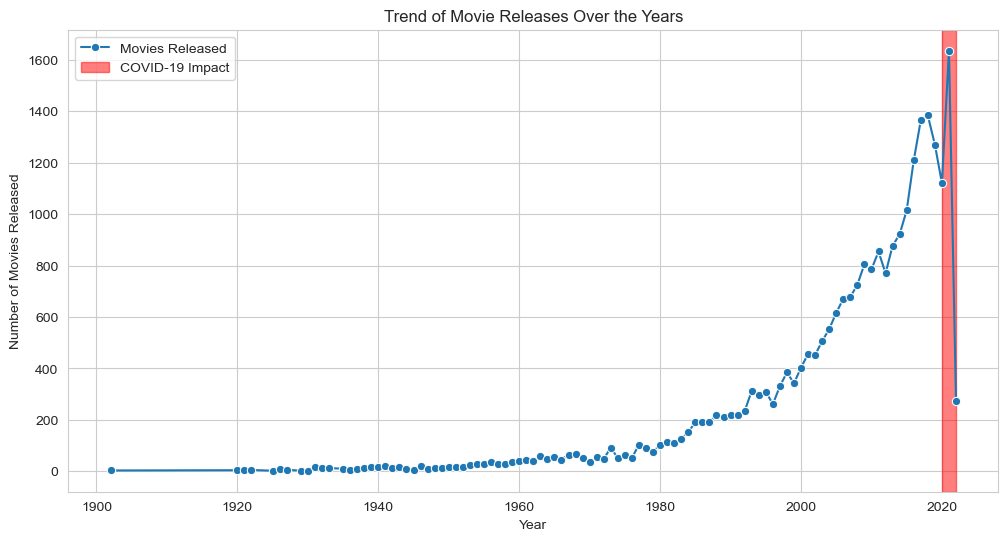

In [30]:
release_counts = df['Release_Date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o', label="Movies Released")

# Annotate COVID-19 period (2020-2021)
plt.axvspan(2020, 2022, color='red', alpha=0.5, label="COVID-19 Impact")

plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Trend of Movie Releases Over the Years")
plt.legend()
plt.show()

### 2) Which movies have the highest popularity score ?

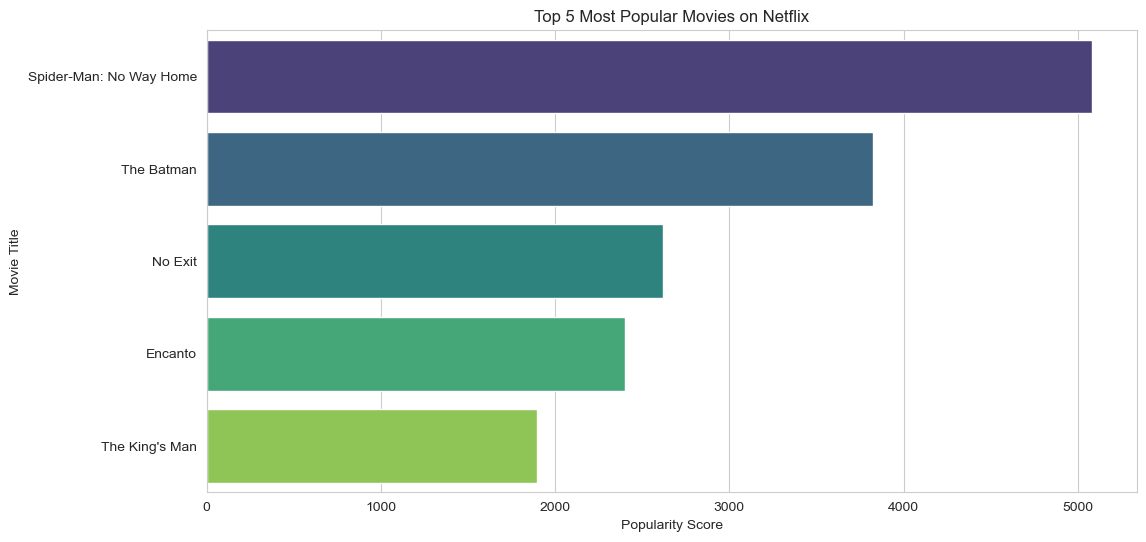

In [31]:
df_unique = df.drop_duplicates(subset=['Title'])
top_movies = df_unique[['Title', 'Popularity']].sort_values(by='Popularity', ascending=False).head(5)


plt.figure(figsize=(12, 6))
sns.barplot(y=top_movies['Title'], x=top_movies['Popularity'], palette="viridis")

plt.xlabel("Popularity Score")
plt.ylabel("Movie Title")
plt.title("Top 5 Most Popular Movies on Netflix")
plt.show()

### 3) Most common genre on Netflix ?

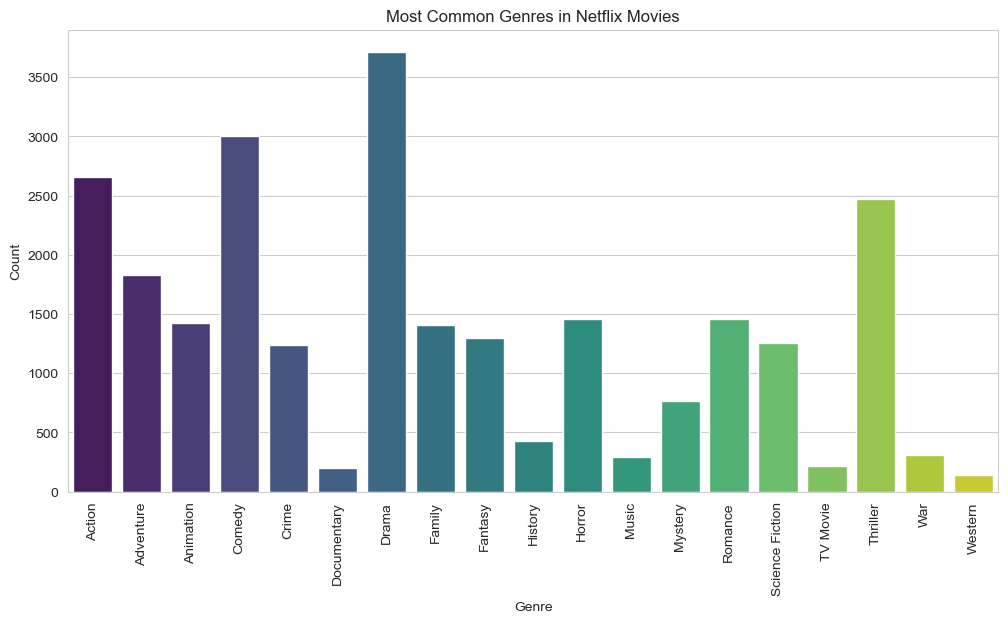

In [32]:
genre_counts = df['Genre'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Most Common Genres in Netflix Movies")
plt.show()

### 4) Which language has the most movies ?

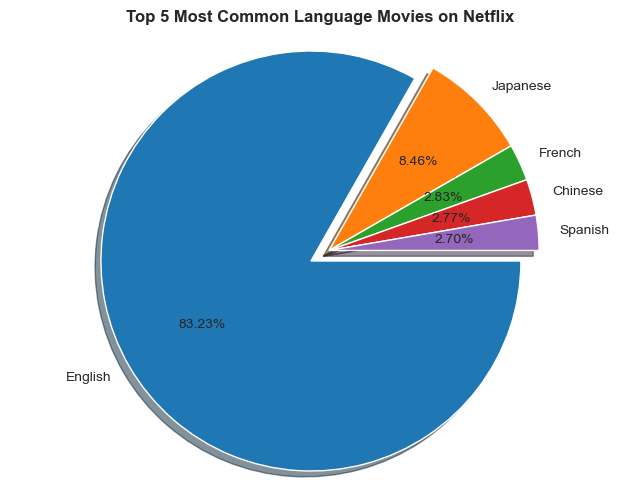

In [40]:
lang_counts = df['Original_Language'].value_counts().head(5)

explode = [0.1] + [0] * (len(lang_counts) -1)

plt.figure(figsize=(8, 6))
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.2f%%', explode=explode, shadow=True,  counterclock=False)
plt.title("Top 5 Most Common Language Movies on Netflix", fontweight='bold')
plt.axis('equal')
plt.show()

### 5) Which language has the least movies on Netflix ?

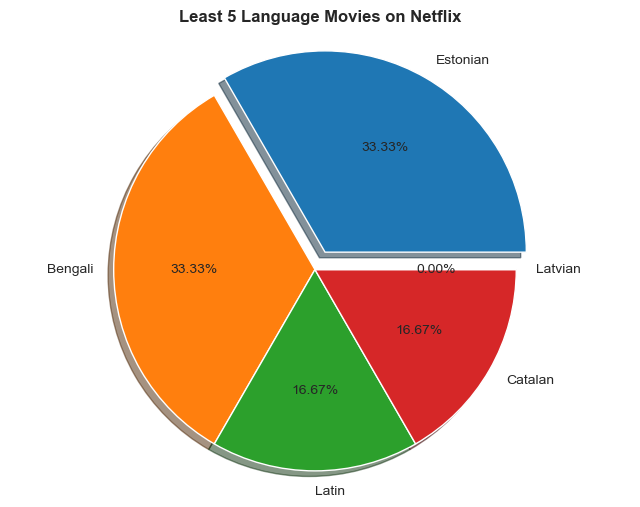

In [50]:
lang_counts = df['Original_Language'].value_counts().tail(5)

explode = [0.1] + [0] * (len(lang_counts) - 1)

plt.figure(figsize=(8, 6))
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.2f%%', explode=explode, shadow=True)
plt.title("Least 5 Language Movies on Netflix", fontweight='bold')
plt.axis('equal')
plt.show()

### 6) Do higher vote counts correlate with higher popularity ?

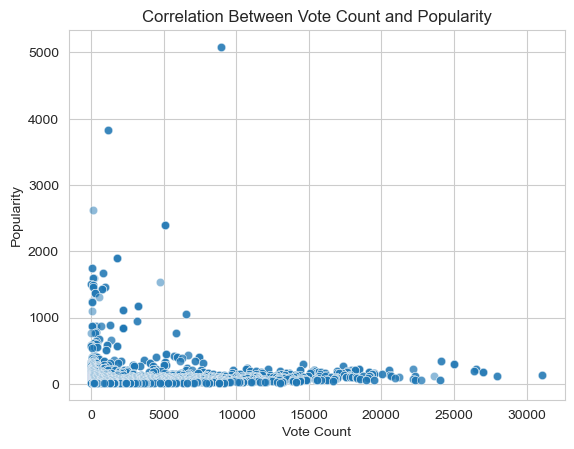

In [51]:
df[['Vote_Count', 'Popularity']].corr()

sns.scatterplot(data=df, x='Vote_Count', y='Popularity', alpha=0.5)
plt.xlabel("Vote Count")
plt.ylabel("Popularity")
plt.title("Correlation Between Vote Count and Popularity")
plt.show()

### 7) Which genres are most popular ?

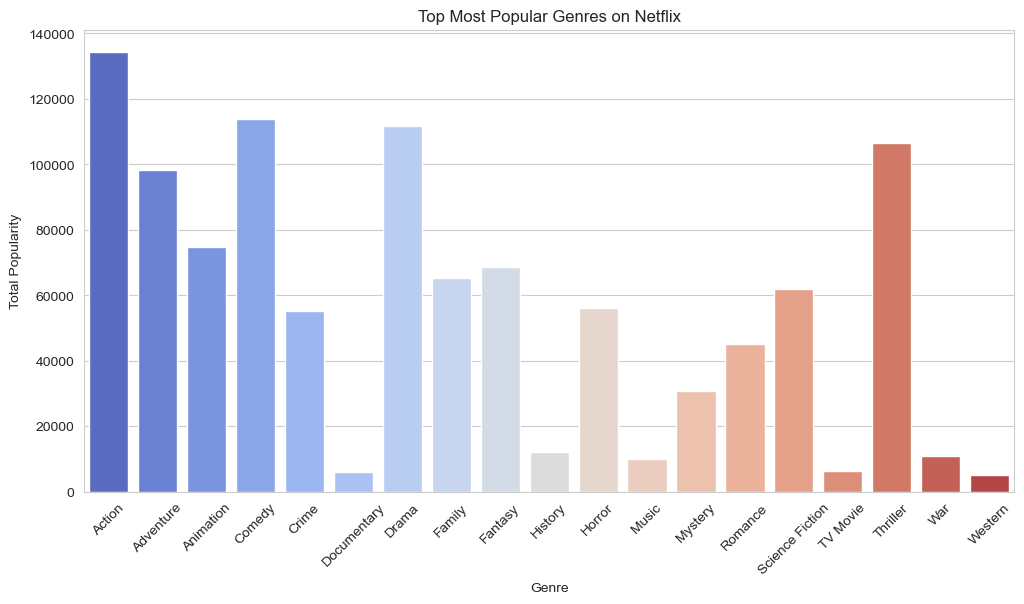

In [52]:
genre_popularity = df.groupby('Genre')['Popularity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Total Popularity")
plt.title("Top Most Popular Genres on Netflix")
plt.show()

### 8) How has movie popularity changed over time ?

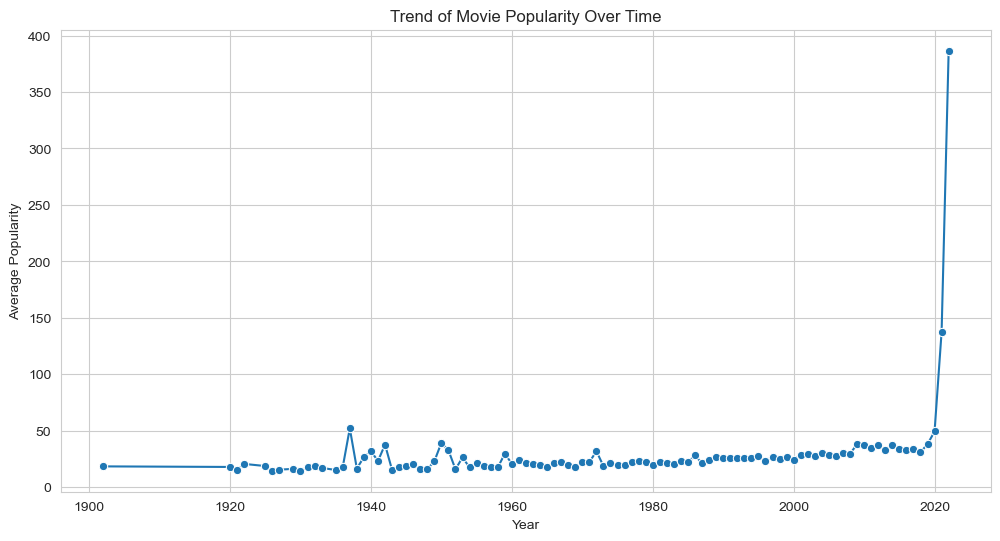

In [53]:
popularity_trend = df.groupby('Release_Date')['Popularity'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=popularity_trend.index, y=popularity_trend.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.title("Trend of Movie Popularity Over Time")
plt.show()

### 9) Do older movies tend to have lower popularity ?

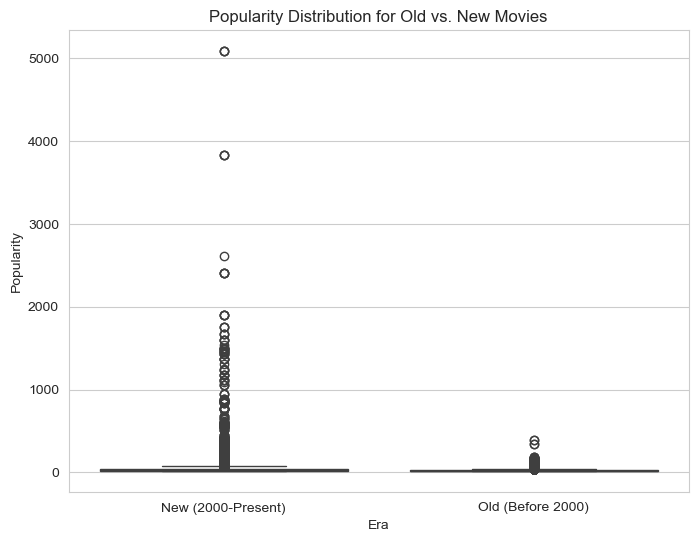

In [54]:
df['Era'] = df['Release_Date'].apply(lambda x: 'Old (Before 2000)' if x < 2000 else 'New (2000-Present)')

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Era'], y=df['Popularity'])
plt.title("Popularity Distribution for Old vs. New Movies")
plt.show()

## Conclusion

1) What is the trend of movie releases over the years ?
*  Steady Growth (2000-2019): Netflix expanded its content library, peaking in 2018-2019. Due to COVID-19 Impact (2020-2021): Sharp decline due to production delays and movie release postponements.

2) Which movies have the highest popularity score ?
*  "Spiderman no Way Home" movie have highest popularity score then "The Batman" and "No Exist".

3) Which genre is most common in Netflix movies ?
* Most common Genre is "Drama" in Netflix Movies than "Comedy". 

4) Which language has the most movies on Netflix?
* Most of the movies are in "English" Language than "Japanese" and "French" Movies.

5) Which language has the least movies on Netflix ?
* Movies of language "Latin" and "Catalan" are the least on Netflix than "Estinian" and "Bengali" Language

6) Do higher vote counts correlate with higher popularity?
*  A higher vote count for a movie does not necessarily mean it will have higher popularity, as there isn't a strong or consistent correlation between the two factors.

7) Which genres tend to be the most popular?
*  "Action" is most popular gnere on Netflix.

8) How has movie popularity changed over time?
*  Trends from 1900 to approximately 2010, followed by a noticeable surge in popularity reaching its peak around 2020. This indicates a significant shift in audience engagement or external factors influencing movie popularity in recent years.

9) Do older movies tend to have lower popularity ?
* Newer movies (post-2000) tend to have higher popularity scores with occasional outliers, while older movies show lower, more consistent popularity levels.